In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline 

In [2]:
# 병합 군집 알고리즘
from sklearn.cluster import AgglomerativeClustering

In [3]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_csv("NHIS_OPEN_GJ_2017_3.csv", encoding='cp949', nrows=7000)
df

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,7010,2,40,160,65,91.0,130.0,80.0,80.0,276.0,1.0,0.0
6996,6996,7011,1,25,165,75,83.6,136.0,86.0,79.0,181.0,1.0,0.0
6997,6997,7012,2,70,150,60,88.0,130.0,80.0,108.0,189.0,1.0,0.0
6998,6998,7013,1,60,175,75,91.5,124.0,72.0,104.0,204.0,3.0,0.0


In [8]:
# 2차원 데이터
data = df[['총콜레스테롤', '허리둘레']]
data

,총콜레스테롤,허리둘레
0,193.0,90.0
1,228.0,89.0
2,136.0,91.0
3,201.0,91.0
4,199.0,80.0
...,...,...
6995,276.0,91.0
6996,181.0,83.6
6997,189.0,88.0
6998,204.0,91.5


In [9]:
# 병합 군집 - 5개로 군집이 줄어들때까지 실행
agg = AgglomerativeClustering(n_clusters=5)
assignment = agg.fit_predict(data)

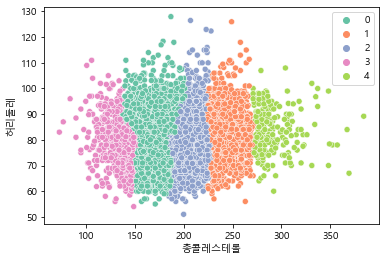

In [10]:
# 위 병합 군집결과를 시각화로 표현
sns.scatterplot(x="총콜레스테롤", y="허리둘레", hue=assignment, 
                data=data, palette="Set2");

In [11]:
# 이번에는 k-평균으로 데이터를 군집화하여 병합 군집과의 차이점을 확인하자
from sklearn.cluster import KMeans

# k-평균 clustering 실행, 5개의 중심점
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [12]:
# k-평균 군집 결과 확인
result_kmeans = data.copy()
result_kmeans["cluster"] = kmeans.labels_
result_kmeans.head()

,총콜레스테롤,허리둘레,cluster
0,193.0,90.0,3
1,228.0,89.0,1
2,136.0,91.0,0
3,201.0,91.0,3
4,199.0,80.0,3


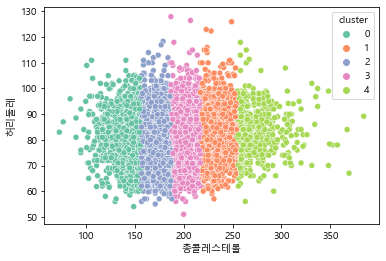

In [13]:
# 위 결과를 시각화로 표현
sns.scatterplot(x="총콜레스테롤", y="허리둘레", hue="cluster", 
                data=result_kmeans, palette="Set2");

In [ ]:
# 위의 두 그래프를 비교하면 약간의 차이가 있다는 것을 확인할 수 있다